# Circular heat plate

In [15]:
using MMJMesh
using MMJMesh.Meshes
using MMJMesh.Plots
using LinearAlgebra
using SparseArrays
using CairoMakie: spy, update_theme!

include("fem.jl")
include("heat.jl")

update_theme!(colormap=:acton)

## Parameters

In [16]:
p = (
    r = 2.2,
    λ = 2.19,
    w = 1.96
)

(r = 2.2, λ = 2.19, w = 1.96)

## Mesh

In [22]:
pwd()

"/Users/maba/sciebo/lehrveranstaltungen/numPDE-2.0/loesungen"

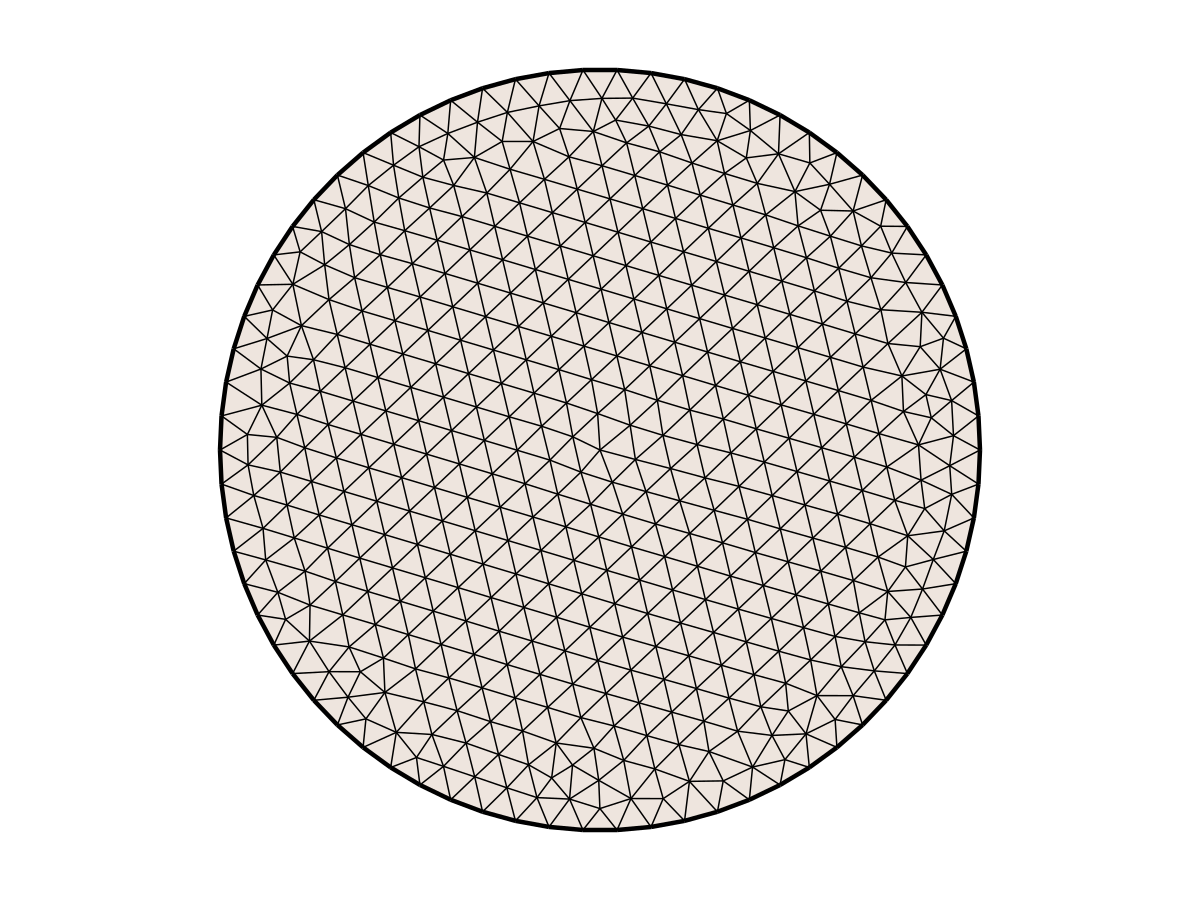

In [30]:
m = Mesh("gmsh/heat-plate.geo")
mplot(m, edgesvisible=true) |> mconf()

## Solution

### Define problem

In [ ]:
setdata!(group(m, :elements), :ke_func, heat_ke(p.λ))
setdata!(group(m, :elements), :re_func, heat_re(p.w))

### Set up linear system

In [16]:
K, r = assemble_kr(m)
apply_dirichlet_bcs!(K, r, group(m, :boundarynodes))

### Solve

Linear system

In [17]:
θHat =  K \ r;

Comparison to exact solution

In [ ]:
thetaMax = p.w * p.r^2 / (4 * p.λ)
thetaMaxH = maximum(θHat)

println("         Exact solution: thethaMax = ", thetaMax)
println("Finite element solution: thethaMax = ", thetaMaxH)
println("                             Error = ", 100 * abs(thetaMaxH - thetaMax) / thetaMax, "%")

### Plot

In [ ]:
mplot(m, θHat, edgesvisible=true, edgecolor=:black) |> mconf()

In [ ]:
θ = p.w / (4 * p.λ) * (p.r^2 .- [norm(coordinates(m, i))^2 for i ∈ 1:nnodes(m)]) 
e = abs.(θHat - θ)
println("Maximum error: ", maximum(e))
mplot(m, e) |> mconf()

## Sparse Matrix

In [ ]:
using SparseArrays
KSparse = sparse(K)
@time That =  K \ r;
@time That =  KSparse \ r;


In [ ]:
using CairoMakie: spy, hidedecorations!, hidespines!, Colorbar, DataAspect
sp = spy(sparse(K), markersize=6, marker=:circle) 
hidedecorations!(sp.axis)
hidespines!(sp.axis)
Colorbar(sp.figure[1, 2])
sp.axis.yreversed = true
sp.axis.aspect = DataAspect()
sp